## What are word embeddings?
Any algorithm that works on text data needs some representation of words in the form of numbers as computers don’t understand text directly. 

Thus, the input words need to be converted into a form understandable by the algorithm , one of the most popular ways is the "one hot encoding" where every word is represented as a vector containing 1 at its position in the vocabulary.

consider our corpus to be a single sentence “The fox is too lazy”. 

Our vocabulary is [‘the’,’fox’,’is’,’too’,’lazy’]. 

Now the one hot encoding for respective words are ,

* fox -> [0,1,0,0,0] 
* the -> [1,0,0,0,0] 
* is ->[0,0,1,0,0] 
* too ->[0,0,0,1,0] 
* lazy->[0,0,0,0,1]

In [ ]:
[0,1,0,0,0] - [1,0,0,0,0] = [1,1,0,0,0]

In [ ]:
#the woman is very beautiful / the woman is not beautiful
[1,1,1,1,1,0] -  [1,1,1,0,1] 
# hamming distance
# score for which values are changed
# 5/6
# sentences are same

The problem with such encoding is that they are not able to capture the relationship between different words because all the vectors are independent.

# Word2Vec

* Word2Vec tries to learn the representation of every word based on the other words that generally occur in its vicinity , thus Word2Vec is able to capture the contextual relationship between words.
* Word2vec represents words in vector space representation. 
* Words are represented in the form of vectors and placement is done in such a way that similar meaning words appear together and dissimilar words are located far away. 
* This is also termed as a semantic relationship.


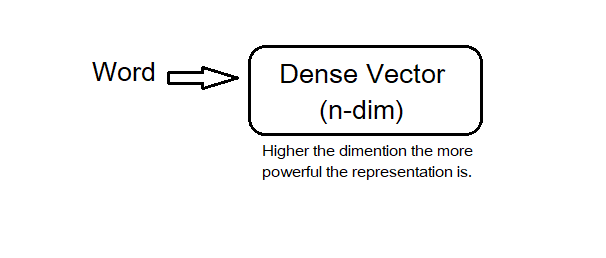

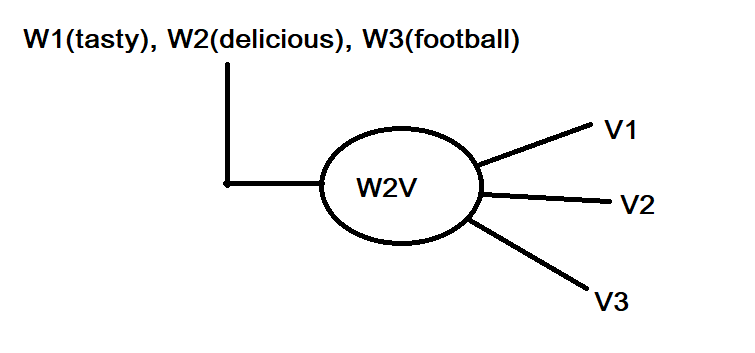

### Expectation:

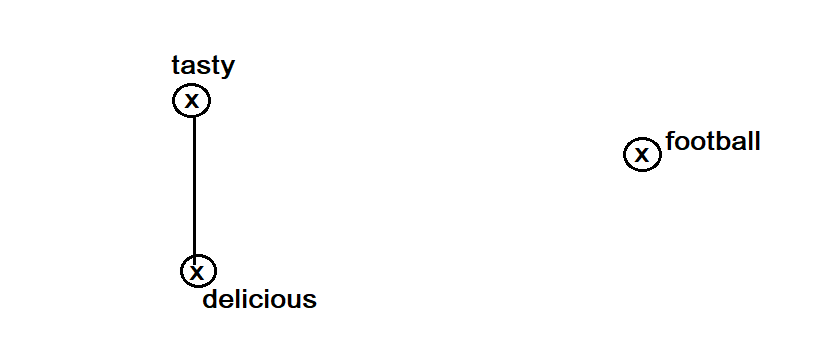

### What does W2V do exactly?

* If W1 and W2 are sementicaly similar then V1&V2 will be closer.


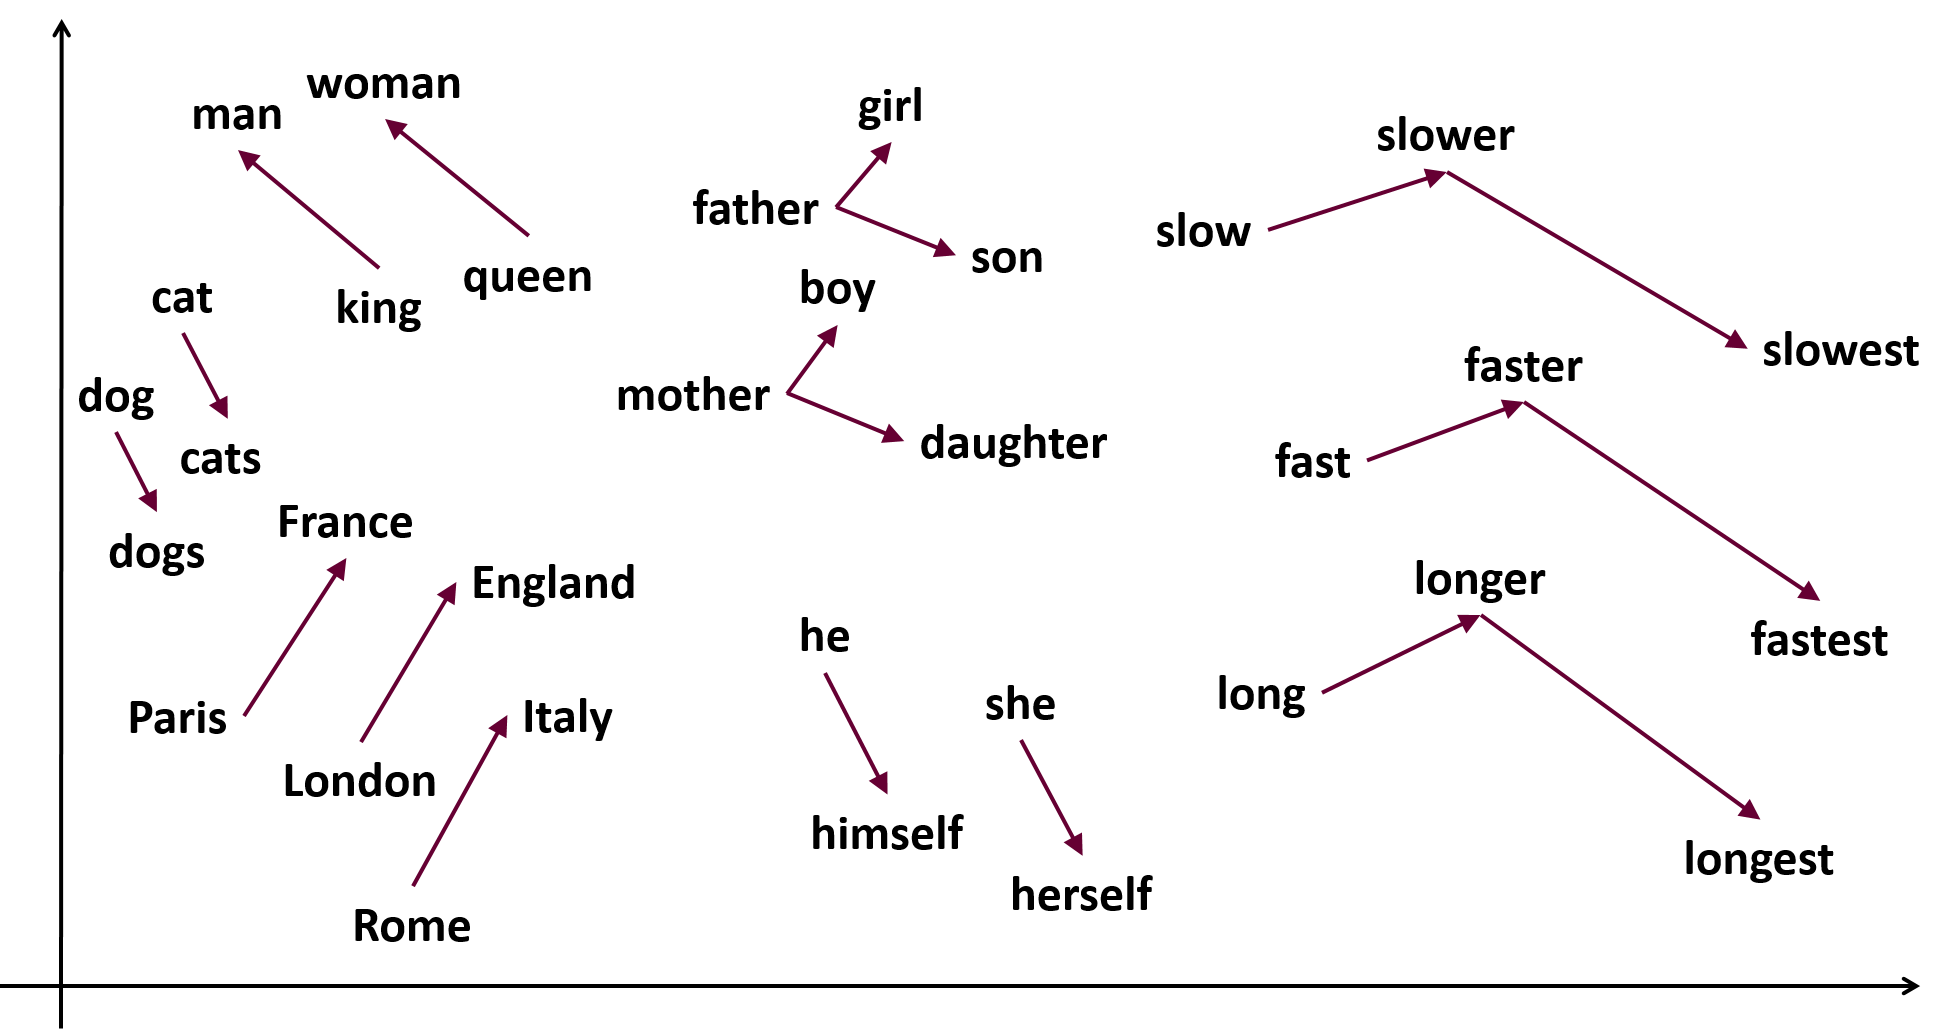

* It satisfies the relationship between the words.
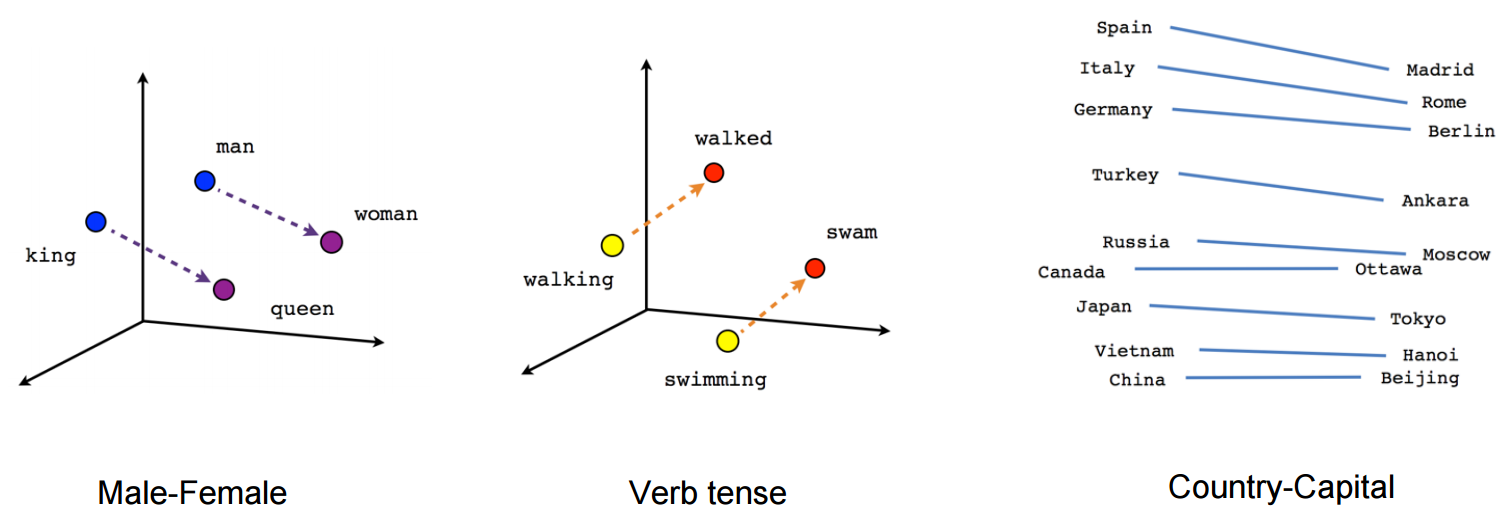

# Train w2v with our own corpus
https://radimrehurek.com/gensim/models/word2vec.html

In [13]:
import nltk

from gensim.models import Word2Vec
from nltk.corpus import stopwords

import re

In [14]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Shritam\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [15]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Shritam\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [11]:
import sklearn.manifold
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [89]:
paragraph = """I have three visions for India. In 3000 years of our history, people from all over 
               the world have come and invaded us, captured our lands, conquered our minds. 
               From Alexander onwards, the Greeks, the Turks, the Moguls, the Portuguese, the British,
               the French, the Dutch, all of them came and looted us, took over what was ours. 
               Yet we have not done this to any other nation. We have not conquered anyone. 
               We have not grabbed their land, their culture, 
               their history and tried to enforce our way of life on them. 
               Why? Because we respect the freedom of others.That is why my 
               first vision is that of freedom. I believe that India got its first vision of 
               this in 1857, when we started the War of Independence. It is this freedom that
               we must protect and nurture and build on. If we are not free, no one will respect us.
               My second vision for India’s development. For fifty years we have been a developing nation.
               It is time we see ourselves as a developed nation. We are among the top 5 nations of the world
               in terms of GDP. We have a 10 percent growth rate in most areas. Our poverty levels are falling.
               Our achievements are being globally recognised today. Yet we lack the self-confidence to
               see ourselves as a developed nation, self-reliant and self-assured. Isn’t this incorrect?
               I have a third vision. India must stand up to the world. Because I believe that unless India 
               stands up to the world, no one will respect us. Only strength respects strength. We must be 
               strong not only as a military power but also as an economic power. Both must go hand-in-hand. 
               My good fortune was to have worked with three great minds. Dr. Vikram Sarabhai of the Dept. of 
               space, Professor Satish Dhawan, who succeeded him and Dr. Brahm Prakash, father of nuclear material.
               I was lucky to have worked with all three of them closely and consider this the great opportunity of my life. 
               I see four milestones in my career"""


In [ ]:
#i bought 2 bedsheets. 

In [90]:
# Preprocessing the data
text = re.sub(r'\[[0-9]*\]',' ',paragraph)
text = re.sub("[^a-zA-Z]"," ", text)
#text = text.split()
text = re.sub(r'\s+',' ',text)
text = text.lower()
text = re.sub(r'\d',' ',text)
text = re.sub(r'\s+',' ',text)

In [91]:
text

'i have three visions for india in years of our history people from all over the world have come and invaded us captured our lands conquered our minds from alexander onwards the greeks the turks the moguls the portuguese the british the french the dutch all of them came and looted us took over what was ours yet we have not done this to any other nation we have not conquered anyone we have not grabbed their land their culture their history and tried to enforce our way of life on them why because we respect the freedom of others that is why my first vision is that of freedom i believe that india got its first vision of this in when we started the war of independence it is this freedom that we must protect and nurture and build on if we are not free no one will respect us my second vision for india s development for fifty years we have been a developing nation it is time we see ourselves as a developed nation we are among the top nations of the world in terms of gdp we have a percent grow

In [92]:
# Preparing the dataset
#conver the paragraph in to sentenses
sentences = nltk.sent_tokenize(text)

In [93]:
sentences

['i have three visions for india in years of our history people from all over the world have come and invaded us captured our lands conquered our minds from alexander onwards the greeks the turks the moguls the portuguese the british the french the dutch all of them came and looted us took over what was ours yet we have not done this to any other nation we have not conquered anyone we have not grabbed their land their culture their history and tried to enforce our way of life on them why because we respect the freedom of others that is why my first vision is that of freedom i believe that india got its first vision of this in when we started the war of independence it is this freedom that we must protect and nurture and build on if we are not free no one will respect us my second vision for india s development for fifty years we have been a developing nation it is time we see ourselves as a developed nation we are among the top nations of the world in terms of gdp we have a percent gro

In [94]:
#convert all sentenses in to words
words = [nltk.word_tokenize(sentence) for sentence in sentences]

In [95]:
#removing stop words
#while removing stopwords, do rember 'not' is also a stopword. 'not' can be a valuable word. Some time we should remove stop word manualy.
for i in range(len(words)):
    words[i] = [word for word in words[i] if word not in stopwords.words('english')]

In [96]:
words

[['three',
  'visions',
  'india',
  'years',
  'history',
  'people',
  'world',
  'come',
  'invaded',
  'us',
  'captured',
  'lands',
  'conquered',
  'minds',
  'alexander',
  'onwards',
  'greeks',
  'turks',
  'moguls',
  'portuguese',
  'british',
  'french',
  'dutch',
  'came',
  'looted',
  'us',
  'took',
  'yet',
  'done',
  'nation',
  'conquered',
  'anyone',
  'grabbed',
  'land',
  'culture',
  'history',
  'tried',
  'enforce',
  'way',
  'life',
  'respect',
  'freedom',
  'others',
  'first',
  'vision',
  'freedom',
  'believe',
  'india',
  'got',
  'first',
  'vision',
  'started',
  'war',
  'independence',
  'freedom',
  'must',
  'protect',
  'nurture',
  'build',
  'free',
  'one',
  'respect',
  'us',
  'second',
  'vision',
  'india',
  'development',
  'fifty',
  'years',
  'developing',
  'nation',
  'time',
  'see',
  'developed',
  'nation',
  'among',
  'top',
  'nations',
  'world',
  'terms',
  'gdp',
  'percent',
  'growth',
  'rate',
  'areas',
  '

In [110]:
print("Word2Vec vocabulary length:", len(words[0]))

Word2Vec vocabulary length: 165


In [118]:
#number of CPUs on the local machine 
import multiprocessing
multiprocessing.cpu_count()

4

In [170]:
# Training the Word2Vec model
model = Word2Vec(words, min_count=1,size=300,  workers=4)  
#min_count--> if the word is not present more then 1, remove it
#size---> higher is size is the more powerful the representation is #default size value= 100
#workers----> Use these many worker threads to train the model (=faster training with multicore machines) #more workers, faster we train
     #number of CPUs on the local machine 
     #import multiprocessing
     #multiprocessing.cpu_count()
       #4
#window (int, optional) – Maximum distance between the current and predicted word within a sentence. #howmany word e are looking at a time
# hs ({0, 1}, optional) – If 1, hierarchical softmax will be used for model training. If 0, and negative is non-zero, negative sampling will be used.
# default hs --> 0
#negative (int, optional) – If > 0, negative sampling will be used, the int for negative specifies how many “noise words” should be drawn (usually between 5-20). If set to 0, no negative sampling is used.
# default negative --> 5


#Large_dataset--> Skip_gram + negative_sampling

In [165]:
# Context window length.
context_size = 7 #window

# Downsample setting for frequent words.
#0 - 1e-5 is good for this
downsampling = 1e-3

# Seed for the RNG, to make the results reproducible.
#random number generator
#deterministic, good for debugging
seed = 1

In [171]:
# Finding Word Vectors
#vector = model.wv['word']
def vector(word):
    vector = model.wv[word]
    print(f"len of the word vector {len(vector)}")
    print()
    print(vector)

In [172]:
vector('life')

len of the word vector 300

[-1.0987014e-03  7.8121678e-04 -2.9765829e-04 -2.4795177e-04
  8.7112864e-04 -1.0389437e-03  5.5482925e-04  1.5036714e-03
  1.0874507e-03 -1.0916354e-03 -7.0192065e-05 -1.2576708e-04
 -3.9734371e-04  5.7345181e-04  1.3712046e-03  1.4888390e-03
  1.8039232e-04 -1.1556223e-03 -1.2234759e-03  1.1205364e-03
  6.9481356e-04  1.9992805e-04 -1.5630295e-03 -1.3138993e-03
 -1.6290615e-03 -1.4100320e-03  1.0306134e-03 -1.4133051e-03
 -1.4646298e-03  1.2368710e-04 -8.2375272e-04 -1.0550346e-03
  7.8563049e-04 -1.2860957e-03 -7.2586432e-04  1.3014645e-04
  9.6600555e-04 -8.5314445e-04  1.2313965e-03 -1.3380355e-03
 -1.6570790e-03 -2.4694216e-04  2.7225082e-04  5.1464088e-04
  9.2054665e-04  5.6996307e-04  5.5811153e-04 -7.9529046e-04
  1.3011701e-03 -1.1287614e-03  9.6930261e-04 -1.1894697e-03
  1.3089768e-03  3.0190585e-04 -5.6663580e-04 -6.6764012e-04
  2.0697608e-04 -9.2887419e-04 -4.0911304e-04 -8.1668969e-04
 -1.0329147e-05  8.1850938e-04 -9.1809884e-04 -1.1756121e

In [168]:
# Most similar words
#similar = model.wv.most_similar(word)
def similar(word):
    similar = model.wv.most_similar(word)
    for i in similar:
        print(i)

In [149]:
similar('life')

('time', 0.15377408266067505)
('strong', 0.1355048418045044)
('areas', 0.1229851245880127)
('war', 0.1183595359325409)
('took', 0.11728134751319885)
('lands', 0.11597142368555069)
('recognised', 0.11392515897750854)
('milestones', 0.11387965828180313)
('stand', 0.1055244579911232)
('must', 0.10351470857858658)


In [105]:
vec = model['life'] - model['time'] + model['war']

C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  """Entry point for launching an IPython kernel.


In [106]:
model.most_similar([vec])

C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  """Entry point for launching an IPython kernel.


[('war', 0.6485985517501831),
 ('life', 0.5649231672286987),
 ('took', 0.14227598905563354),
 ('years', 0.1382468193769455),
 ('top', 0.10037311911582947),
 ('areas', 0.09639505296945572),
 ('grabbed', 0.09539122879505157),
 ('nations', 0.09419821947813034),
 ('french', 0.09083548933267593),
 ('dutch', 0.09065504372119904)]

In [176]:
def nearest_similarity_cosmul(start1, end1, end2):
    similarities = model.most_similar_cosmul(
        positive=[end2, start1],
        negative=[end1]
    )
    start2 = similarities[0][0]
    print("{start1} is related to {end1}, as {start2} is related to {end2}".format(**locals()))
    return start2

In [156]:
nearest_similarity_cosmul("freedom", "india", "career")

freedom is related to india, as anyone is related to career


C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: DeprecationWarning: Call to deprecated `most_similar_cosmul` (Method will be removed in 4.0.0, use self.wv.most_similar_cosmul() instead).
  after removing the cwd from sys.path.


'anyone'

In [177]:
try:
    nearest_similarity_cosmul("freedom", "india", "is")
except KeyError:
    print("please try other word")

please try other word


C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: DeprecationWarning: Call to deprecated `most_similar_cosmul` (Method will be removed in 4.0.0, use self.wv.most_similar_cosmul() instead).
  after removing the cwd from sys.path.


# Pre-trained Google News W2v model

In [111]:
from gensim.models import Word2Vec, KeyedVectors  #The trained word vectors are stored in a KeyedVectors
import pandas
import nltk

In [123]:
model_pre = KeyedVectors.load_word2vec_format('GoogleNews-vectors-negative300.bin', binary = True, limit = 100000)

In [130]:
vec = model_pre['life'] - model_pre['time'] + model_pre['war']

In [131]:
model_pre.most_similar([vec])

[('war', 0.7821648716926575),
 ('life', 0.6019867658615112),
 ('wars', 0.5609234571456909),
 ('occupation', 0.4995642304420471),
 ('lives', 0.4842851161956787),
 ('invasion', 0.4761863946914673),
 ('Vietnam_War', 0.4695128798484802),
 ('Iraq', 0.4654041528701782),
 ('warfare', 0.4553490877151489),
 ('liberation', 0.4540294408798218)]

In [126]:
len(model_pre['war'])

300

In [128]:
vec = model_pre['Messi'] - model_pre['football'] + model_pre['cricket']
model_pre.most_similar([vec])

[('Messi', 0.7753990888595581),
 ('Tendulkar', 0.7388709783554077),
 ('Sehwag', 0.7030156850814819),
 ('Sachin_Tendulkar', 0.6963865756988525),
 ('Dhoni', 0.6875312328338623),
 ('Yuvraj', 0.6863861680030823),
 ('Dravid', 0.6852535009384155),
 ('Ponting', 0.6836135983467102),
 ('Inzamam', 0.6815570592880249),
 ('Ganguly', 0.6674576997756958)]

In [134]:
def nearest_similarity_cosmul(start1, end1, end2):
    similarities = model_pre.most_similar_cosmul(
        positive=[end2, start1],
        negative=[end1]
    )
    start2 = similarities[0][0]
    print("{start1} is related to {end1}, as {start2} is related to {end2}".format(**locals()))
    return start2

In [136]:
nearest_similarity_cosmul("man", "Women", "king")

man is related to Women, as prince is related to king


'prince'